In [1]:
from Preprocessing_Module import read_data, add_topological, add_landcover, merge_new_data, fill_data, select_columns, reshape_dataset, fillna_dataset, remove_nan_features, unused_stations
from Feature_Expansion_Module import feature_expansion
from Initializer_Module import initializer
from XGboost_Model_Module import Xgboost_model
from Neural_Network_Module import FeedforwardNeuralNetModel
from Model_Validation_Module import give_predictions_nn, evaluate_nn, give_predictions_xgboost, evaluate_xgboost, validate_results, merge_predictions
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [ ]:
# original backup cell from Argyro
# Run the Next

data = read_data('../Datasets/Greece/GRE_culex_2011_2023.csv')
data = merge_new_data('../Datasets/Greece/monthly_data/GRE_culex_ento_2024_09_processed.csv', data)
data = merge_new_data('../Datasets/Greece/monthly_data/GRE_env_2024_10_2km_processed.csv', data)
#======================================================================
data = data[(data.nuts2_name == 'THESSALY') | (data.nuts2_name == 'Π. ΘΕΣΣΑΛΙΑΣ')]
data = data.reset_index(drop=True)
#======================================================================
columns = ['dt_placement', 'x', 'y', 'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2024.csv')
# data = merge_new_data('../Datasets/Greece/monthly_data/GRE_culex_ento_2024_09_processed.csv', data)
data = merge_new_data('../Datasets/Greece/monthly_data/GRE_env_2025_05_2km_processed.csv', data)
#======================================================================
data = data[(data.nuts2_name == 'THESSALY') | (data.nuts2_name == 'Π. ΘΕΣΣΑΛΙΑΣ')]
data = data.reset_index(drop=True)
#======================================================================
columns = ['dt_placement', 'x', 'y', 'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the date of prediction for the test set
date = '2025-05-01'

# set the filename for export
case = 'Culex_Greece_Thessaly_'

# set the filename to export
path = './predictions/Greece/Thessaly/'

title = date[:-3].replace('-','_')
title = case + title

# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'

In [5]:
data = feature_expansion(data)

In [6]:
data = initializer(data, model_type, 10, flag=True)

Bounds: [0, 1.0, 3.0, 6.0, 10.0, 17.0, 29.0, 44.0, 77.0, 162.0, 1652.0]


In [7]:
print("#===========================================")
print("Performance of the previous month")
print("#===========================================")
print()
validate_results(path+case + date[:-3].replace(date[:-3].split('-')[1],str(int(date[:-3].split('-')[1])-1)).replace('-','_')+'.csv',data)

#===========================================
Performance of the previous month
#===========================================

Mean time difference in days: -1.8
-------------------
Overall MAE: 2.4
Overall % error <=3: 75.0
number of observations: 20
-------------------
MAE with entomological: 1.8
% error <=3 with entomological: 80.0
number of observations: 10
-------------------
MAE without entomological: 3.0
% error <=3 without entomological: 70.0
number of observations: 10
-------------------


#===========================================
Predictions without entomological features
#===========================================

Epoch 001: | Train Loss: 25.34470 | Val Loss: 27.82155 | Train Acc: 4.233| Val Acc: 4.481
Epoch 002: | Train Loss: 23.27082 | Val Loss: 23.78238 | Train Acc: 4.022| Val Acc: 4.100
Epoch 003: | Train Loss: 20.67497 | Val Loss: 20.49645 | Train Acc: 3.787| Val Acc: 3.758
Epoch 004: | Train Loss: 18.90681 | Val Loss: 17.73938 | Train Acc: 3.599| Val Acc: 3.421
Epoch 005: | Train Loss: 17.44159 | Val Loss: 15.63778 | Train Acc: 3.465| Val Acc: 3.217
Epoch 006: | Train Loss: 16.37421 | Val Loss: 14.35770 | Train Acc: 3.331| Val Acc: 3.037
Epoch 007: | Train Loss: 15.19261 | Val Loss: 13.44363 | Train Acc: 3.218| Val Acc: 2.957
Epoch 008: | Train Loss: 14.50610 | Val Loss: 12.58247 | Train Acc: 3.097| Val Acc: 2.846
Epoch 009: | Train Loss: 13.57032 | Val Loss: 11.88500 | Train Acc: 3.013| Val Acc: 2.814
Epoch 010: | Train Loss: 12.69776 | Val Loss: 11.43328 |

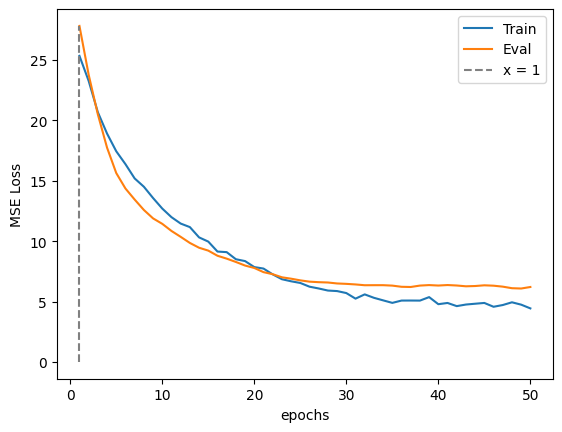

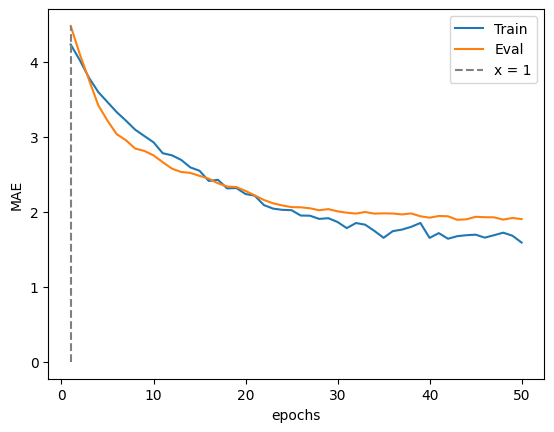

MAE on train set:  1.446969696969697
min prediction: 0
max prediction: 9

MAE on test set:  1.829145728643216
Error <= 3: 85.93 %
min prediction: 0
max prediction: 9


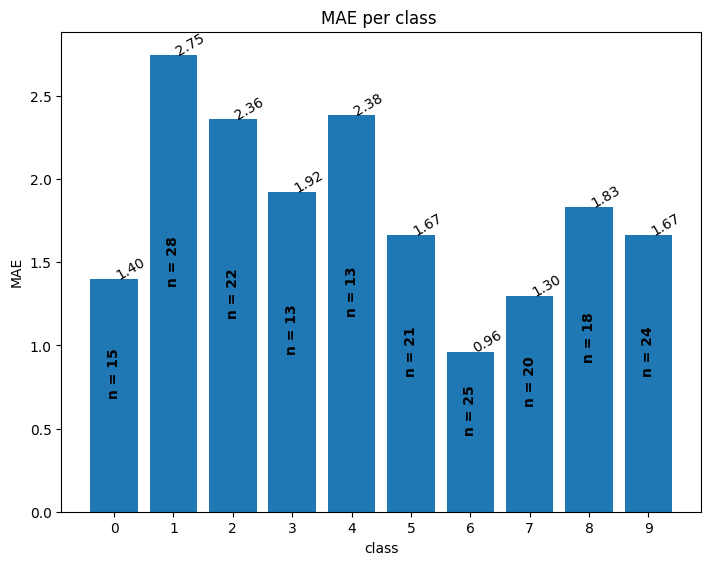

-----------|class error-MAE| difference-----------
mean: 0.42613286713286713
std: 0.34020484379327354
coefficient of variation (std/mean): 0.7983539173644603

----------normalized difference-------------
mean: 0.3933534158149543
std: 0.3140352404245602


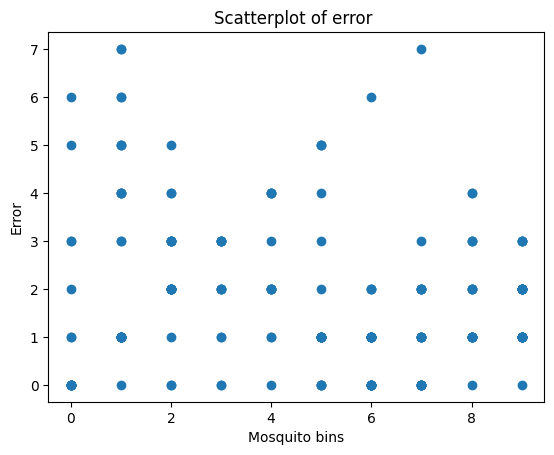

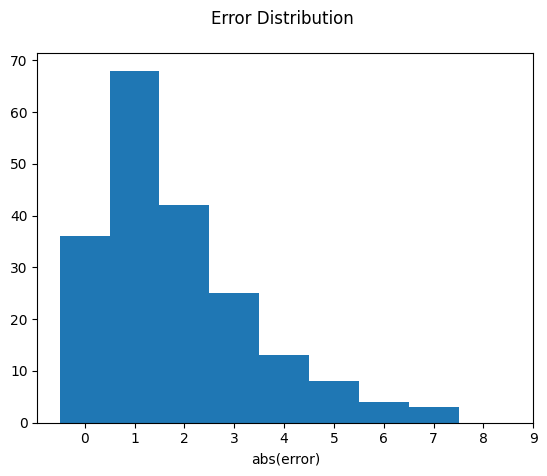

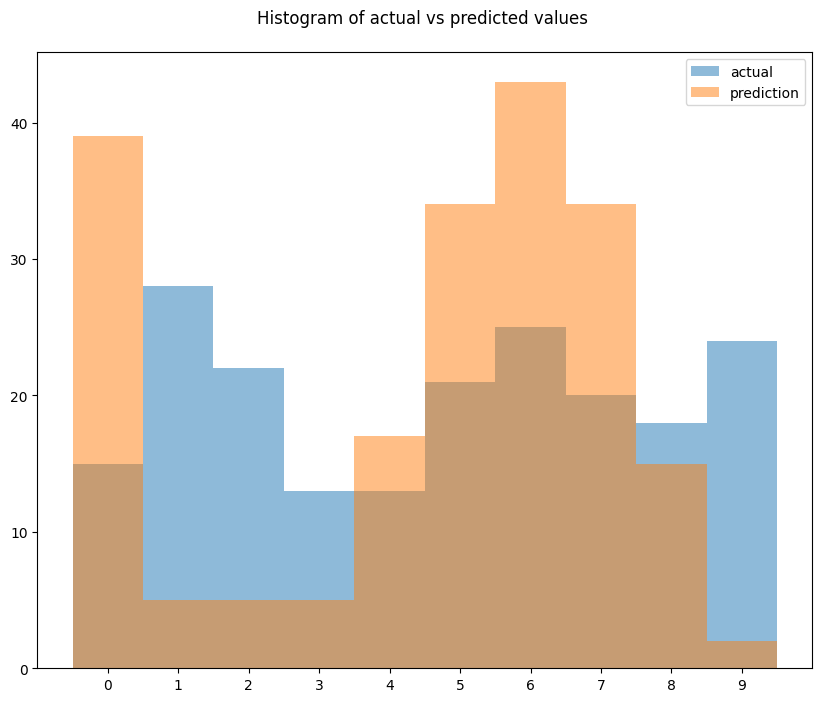

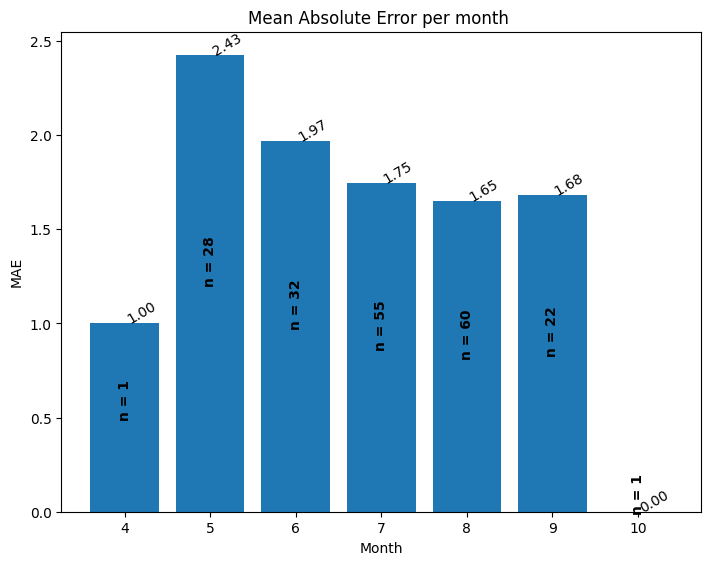

prediction
0    982
1    273
2    262
3    256
4    319
5    367
6    378
7    322
8    223
9    223
Name: count, dtype: int64

Low risk category stations: 1255
Medium risk category stations: 1204
High risk category stations: 1146
#===========================================
Predictions with entomological features
#===========================================

Epoch 001: | Train Loss: 24.66828 | Val Loss: 33.33035 | Train Acc: 4.210| Val Acc: 5.120
Epoch 002: | Train Loss: 23.13290 | Val Loss: 32.28702 | Train Acc: 4.082| Val Acc: 5.017
Epoch 003: | Train Loss: 23.19373 | Val Loss: 29.96209 | Train Acc: 4.048| Val Acc: 4.838
Epoch 004: | Train Loss: 21.62621 | Val Loss: 27.85527 | Train Acc: 3.918| Val Acc: 4.624
Epoch 005: | Train Loss: 20.30010 | Val Loss: 25.43996 | Train Acc: 3.758| Val Acc: 4.419
Epoch 006: | Train Loss: 19.55701 | Val Loss: 23.44323 | Train Acc: 3.713| Val Acc: 4.274
Epoch 007: | Train Loss: 18.56096 | Val Loss: 21.87531 | Train Acc: 3.599| Val Acc: 4.034
Epoch 00

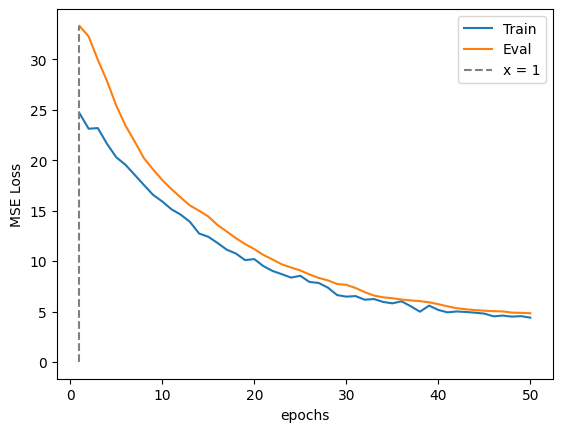

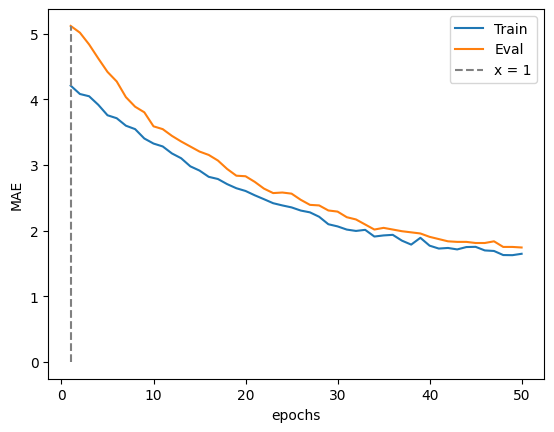

MAE on train set:  1.3819742489270386
min prediction: 0
max prediction: 9

MAE on test set:  1.7435897435897436
Error <= 3: 87.18 %
min prediction: 0
max prediction: 9


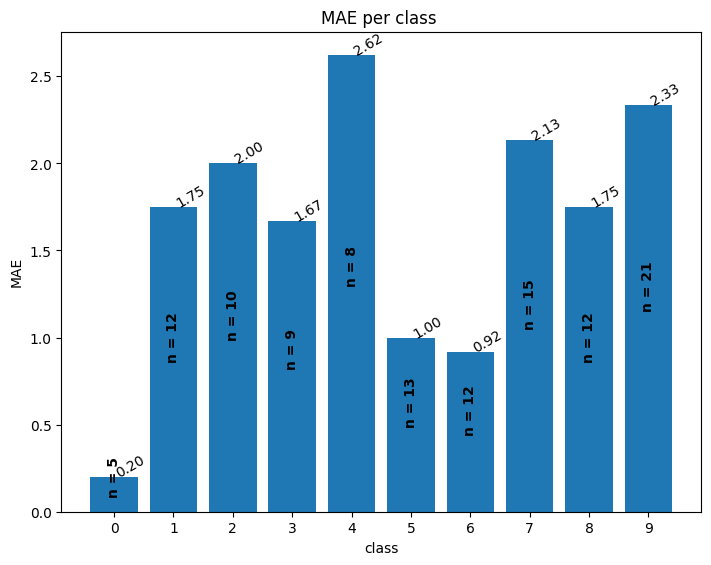

-----------|class error-MAE| difference-----------
mean: 0.7541666666666668
std: 0.6331935152682612
coefficient of variation (std/mean): 0.8395936114054291

----------normalized difference-------------
mean: 0.353515625
std: 0.29680946028199745


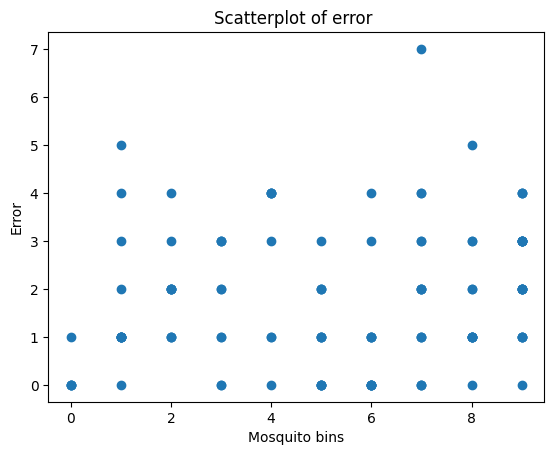

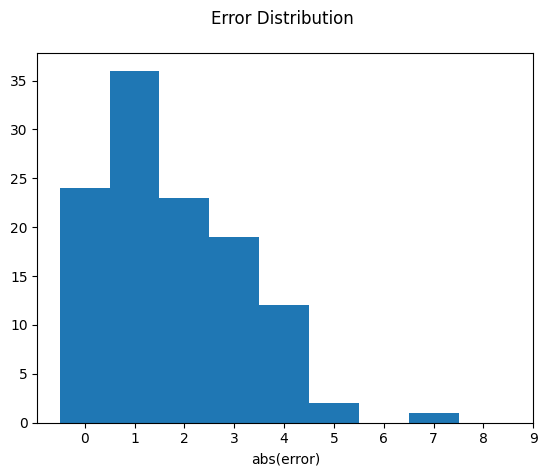

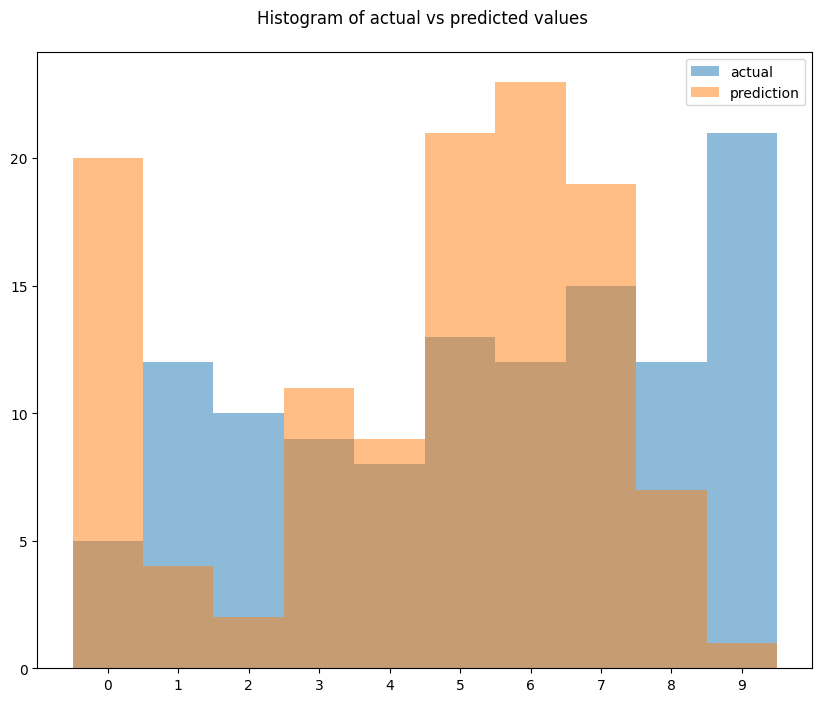

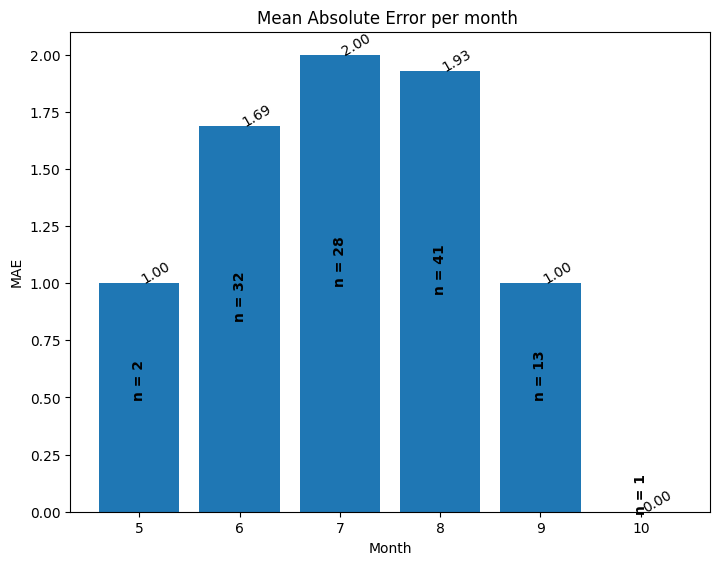

prediction
0    2
1    1
2    2
4    1
5    1
7    1
8    2
9    2
Name: count, dtype: int64

Low risk category stations: 3
Medium risk category stations: 4
High risk category stations: 5
#===========================================
Predictions with/without entomological features
#===========================================
prediction
0    981
1    272
2    263
3    256
4    320
5    368
6    377
7    320
8    223
9    225
Name: count, dtype: int64

Low risk category stations: 1253
Medium risk category stations: 1207
High risk category stations: 1145


In [8]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================

data = data.drop(columns = ['acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan'])

# Spit to train and test based on date of predictions
test = data.loc[data[date_col] >= pd.to_datetime(date)]
data = data.loc[data[date_col] < pd.to_datetime(date)]

# Delete from test set stations that are not used during the last 3 years
# test = unused_stations(data, test, period=3)

#Remove features that are more 40% filled with nan values in the test set
data, test = remove_nan_features(data, test, 0.4)

# set the only_env as True if there are no mosquitoes for the forecast month
only_env=None    
if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
    only_env=False
elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
    only_env=True
else:
    print('No data left for prediction')
    
num_class = 1
hidden_layers = [264,128,128,64,32]
learning_rate = 0.001
epochs = 50
batch_size = 128
dropout = 0.2
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False
    
if only_env != None:
    # Run first without entomological features
    print("#===========================================")
    print("Predictions without entomological features")
    print("#===========================================")
    print()
    data_env = data.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)

    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)

    
    model = FeedforwardNeuralNetModel(num_features=len(data_env.iloc[0,:])-2, num_class=num_class,
                                      hidden_layers = hidden_layers, model_type=model_type,
                                      learning_rate = learning_rate, epochs = epochs, batch_size = batch_size,
                                      dropout = dropout, embedding_data=embedded_data, 
                                      transformation_list=transformation_list, early_stop = early_stop, 
                                      l1_weight=0, l2_weight=0, weights=False)

    evaluate_nn(model, data_env, fi = fi)

    predictions_env = give_predictions_nn(model, data_env, test_env, env = True, filepath = path, case = title,
                                          export = only_env)

    # Run with entomological features if at least one station has mosquitos number
    if not only_env:
        print("#===========================================")
        print("Predictions with entomological features")
        print("#===========================================")
        print()
        
        data_entom = data.dropna().reset_index(drop=True)
        test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        model = FeedforwardNeuralNetModel(num_features=len(data_entom.iloc[0,:])-2, num_class=num_class,
                                          hidden_layers = hidden_layers, model_type=model_type,
                                          learning_rate = learning_rate, epochs = epochs, batch_size = batch_size,
                                          dropout = dropout, embedding_data=embedded_data, 
                                          transformation_list=transformation_list, early_stop = early_stop, 
                                          l1_weight=0, l2_weight=0, weights=False)
        
        evaluate_nn(model, data_entom, fi = fi)

        predictions_entom = give_predictions_nn(model, data_entom, test_entom, env = False, filepath = path,
                                                case = title, export = False)

        print("#===========================================")
        print("Predictions with/without entomological features")
        print("#===========================================")
        merge_predictions(predictions_env,predictions_entom,path,title,export=True)

#===========================================
Predictions without entomological features
#===========================================



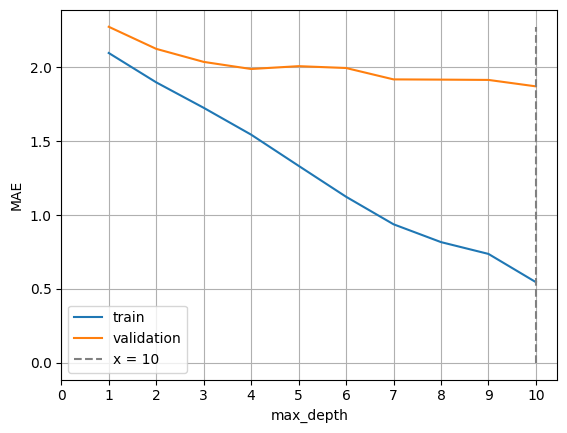

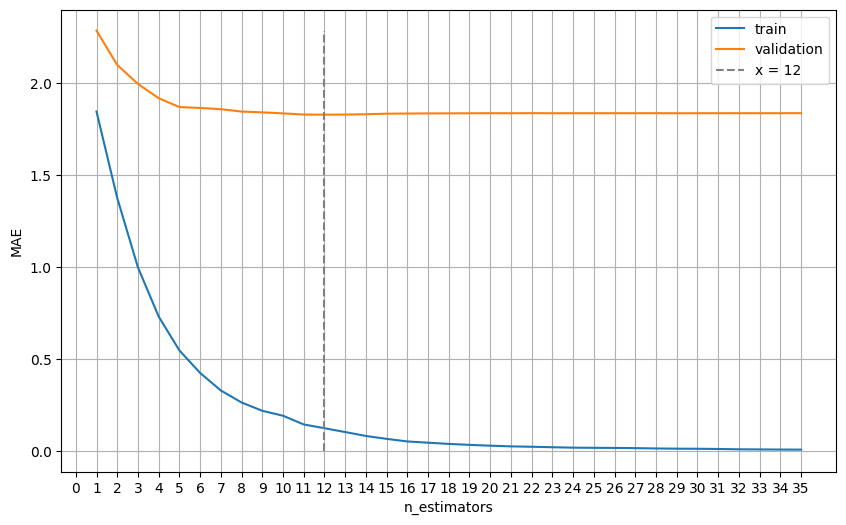

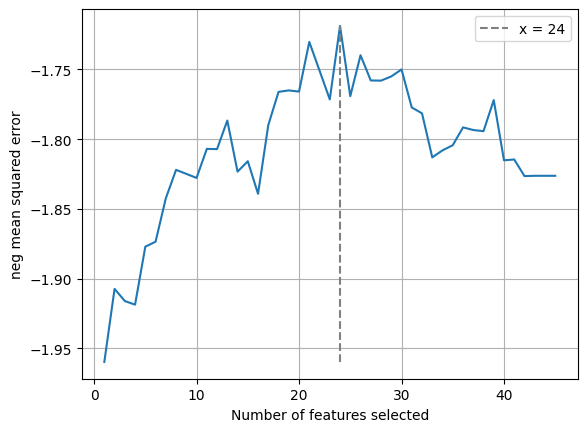

max_depth:  10
Number of estimators:  12
Selected_features:  Index(['x', 'y', 'acc_rainfall_1week', 'acc_rainfall_2week',
       'acc_rainfall_jan', 'lst_jan_day_mean', 'lst_feb_day_mean',
       'lst_mar_day_mean', 'lst_apr_day_mean', 'lst_jan_night_mean',
       'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean',
       'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ELEVATION_mean_1km',
       'FLOW_ACCU_200m', 'landcover', 'null_island_distance', 'days_distance',
       'mo_cos', 'year', 'lst', 'summer_days_month'],
      dtype='object')
MAE on train set:  0.034334763948497854
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.6495726495726495
Error <= 3: 88.03 %
min prediction: 0.0
max prediction: 9.0


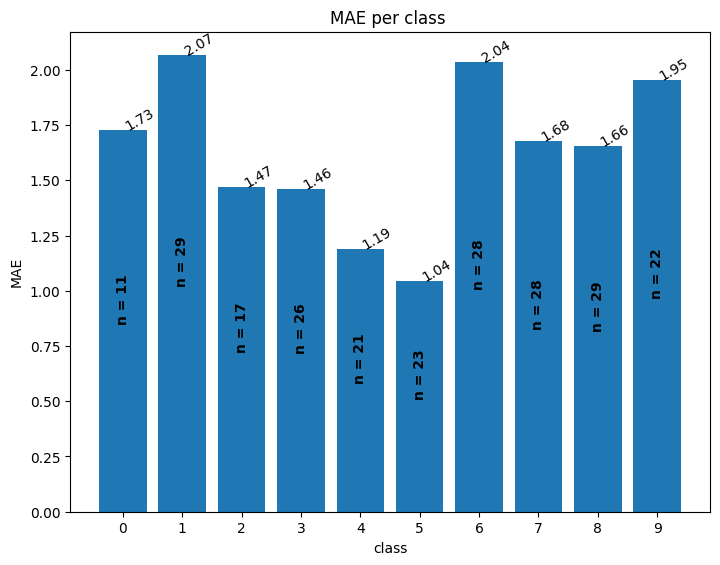

-----------|class error-MAE| difference-----------
mean: 0.3650309357867344
std: 0.28209200965251735
coefficient of variation (std/mean): 0.7727893227584599

----------normalized difference-------------
mean: 0.40066302279411625
std: 0.30962810603942253


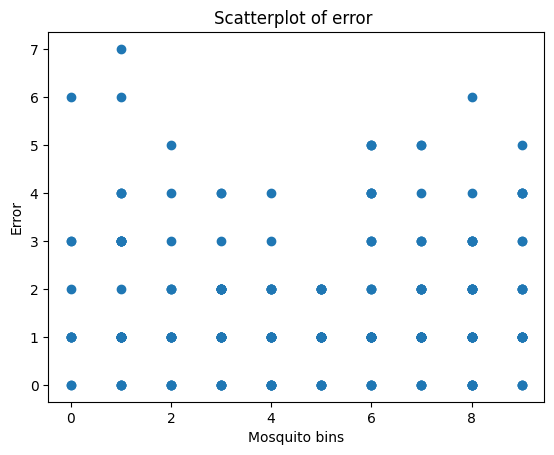

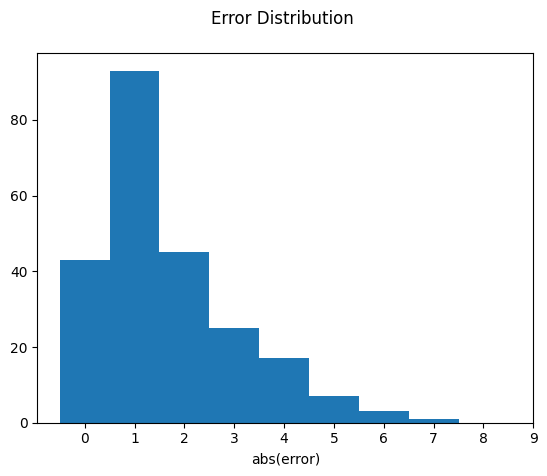

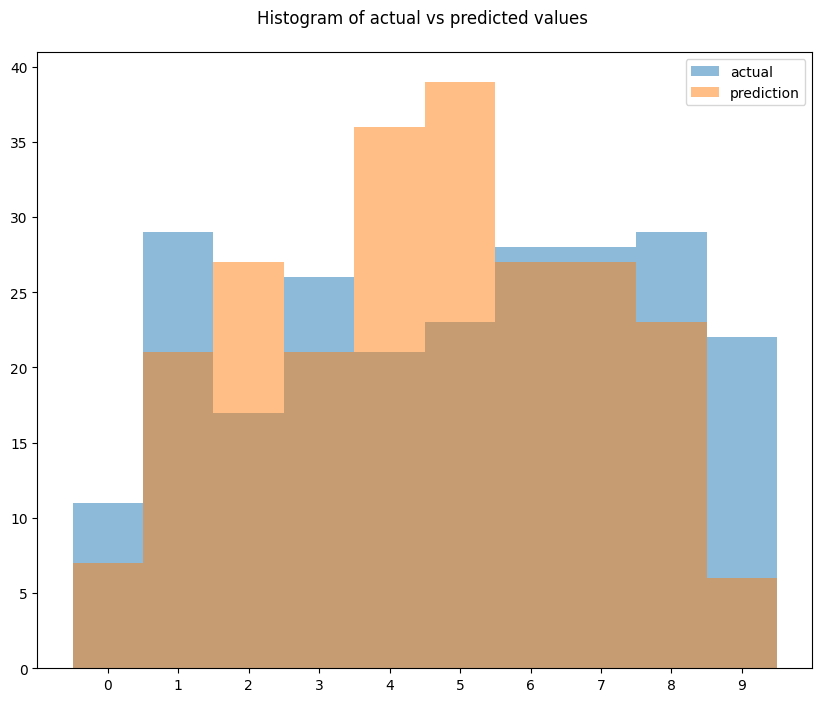

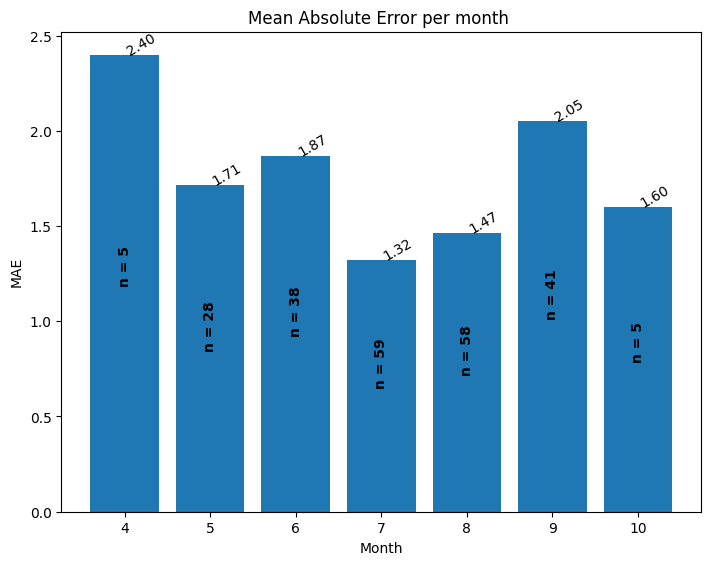

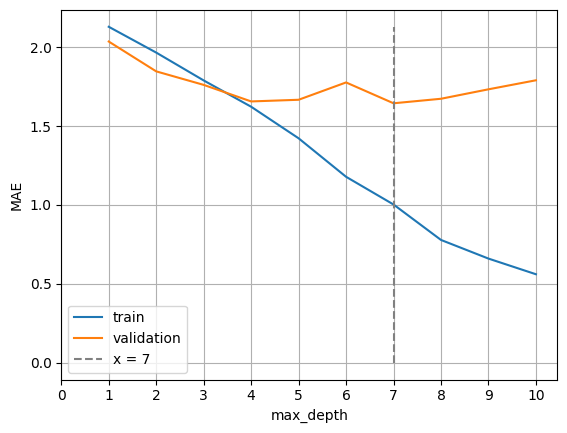

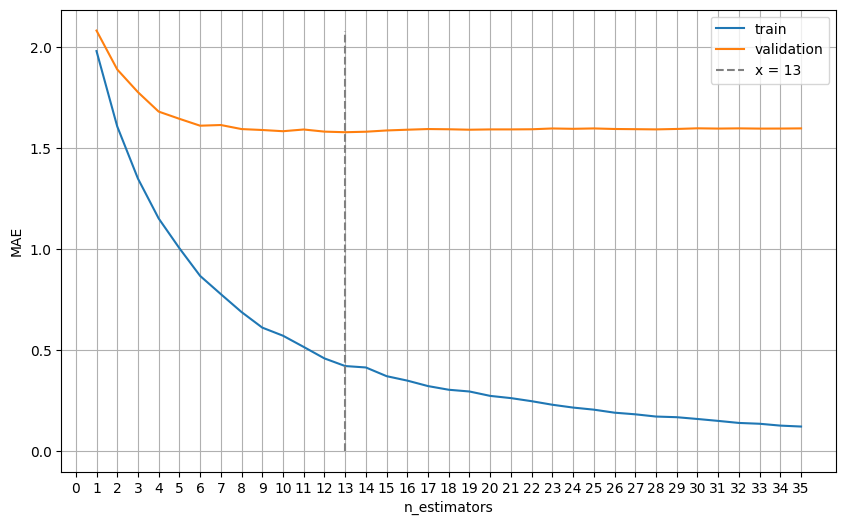

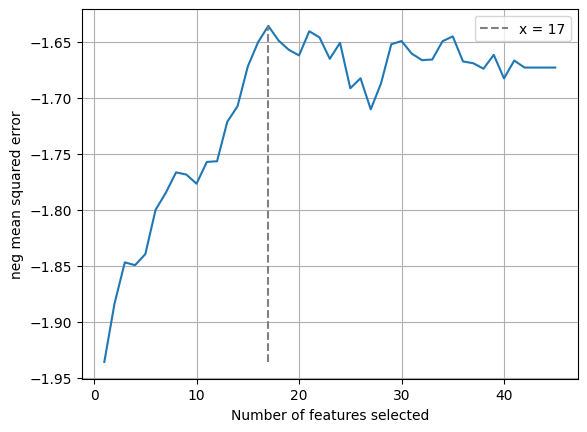

max_depth:  7
Number of estimators:  13
Selected_features:  Index(['x', 'y', 'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean',
       'lst_apr_day_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_RIVER', 'ASPECT_mean_200m',
       'ELEVATION_mean_1km', 'FLOW_ACCU_200m', 'null_island_distance',
       'days_distance', 'year', 'lst'],
      dtype='object')
prediction
-0.0     494
 1.0    1033
 2.0     810
 3.0     531
 4.0     426
 5.0     259
 6.0      64
 7.0       6
Name: count, dtype: int64

Low risk category stations: 1527
Medium risk category stations: 2026
High risk category stations: 70


In [7]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================

# Spit to train and test based on date of predictions
test = data.loc[data[date_col] >= pd.to_datetime(date)]
data = data.loc[data[date_col] < pd.to_datetime(date)]

# Delete from test set stations that are not used during the last 3 years
# test = unused_stations(data, test, period=3)

#Remove features that are more 40% filled with nan values in the test set
data, test = remove_nan_features(data, test, 0.3)

# set the only_env as True if there are no mosquitoes for the forecast month
only_env=None    
if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
    only_env=False
elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                           'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
    only_env=True
else:
    print('No data left for prediction')
    

learning_rate = 0.3
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance (!very time consuming!)
fi = False
    
if only_env != None:
    # Run first without entomological features
    print("#===========================================")
    print("Predictions without entomological features")
    print("#===========================================")
    print()
    data_env = data.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                          'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
    
    data_env = data_env.dropna().reset_index(drop=True)
    test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)

    model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
    evaluate_xgboost(model, data_env, fi = fi)

    predictions_env = give_predictions_xgboost(model, data_env, test_env, env = True, filepath = path, case = title,
                                               fi = fi, export = only_env)


    # Run with entomological features if at least one station has mosquitos number
    if not only_env:
        print("#===========================================")
        print("Predictions with entomological features")
        print("#===========================================")
        print()
        
        data_entom = data.dropna().reset_index(drop=True)
        test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        model = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                              embedding_data = embedded_data,  transformation_list = transformation_list,
                              early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)
    
        evaluate_xgboost(model, data_entom, fi = fi)

        predictions_entom = give_predictions_xgboost(model, data_entom, test_entom, env = True, filepath = path,
                                                     fi = fi, case = title, export = False)

        print("#===========================================")
        print("Predictions with/without entomological features")
        print("#===========================================")
        merge_predictions(predictions_env,predictions_entom, path, title, export=True)